In [1]:
import pandas as pds
import numpy as npy
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Data_all = (pds.read_csv("intermediaire.csv",delimiter=";"))
Data_C = Data_all.drop(["LoanId"],axis=1) 
Data_A = Data_C.drop(['ProbabilityOfDefault', 'Rate_AA', 'Rate_A', 'Rate_B', 'Rate_C','Rate_D', 'Rate_E', 'Rate_F', 'Rate_HR'],axis=1) #retrait des 9 variables de Bondora
Data_B = Data_C.drop(['NewCreditCustomer', 'LoanDate', 'VerificationType','Language_Estonian ', 'Language_English', 'Language_Russian','Language_Finnish', 'Language_German', 'Language_Slovakian','Country_EE', 'Country_ES', 'Country_FI', 'Country_SK', 'Age','Gender_woman', 'Gender_Undefined', 'Education', 'MaritalStatus','Unemployed', 'Partially_employed', 'Fully_employed', 'Self_employed','Entrepreneur', 'Retiree', 'AppliedAmount', 'Interest', 'LoanDuration','MonthlyPayment', 'UseOfLoan', 'EmploymentDurationCurrentEmployer_+5','EmploymentDurationCurrentEmployer_Trial','EmploymentDurationCurrentEmployer_max1','EmploymentDurationCurrentEmployer_max2','EmploymentDurationCurrentEmployer_max3','EmploymentDurationCurrentEmployer_max4','EmploymentDurationCurrentEmployer_max5','EmploymentDurationCurrentEmployer_retiree','EmploymentDurationCurrentEmployer_other','IncomeFromPrincipalEmployer', 'IncomeFromPension','IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare','IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther','IncomeTotal', 'LiabilitiesTotal', 'DebtToIncome', 'FreeCash'], axis=1) # retrait des variables sur prêt et particulier
Variable_A = Data_A.columns
Variable_B = Data_B.columns
Variable_C = Data_C.columns

Data_A_X=npy.array(Data_A).T[1:].T
Data_A_Y=npy.array(Data_A).T[:1].T.reshape(len(Data_A_X),)
print(Data_A_X.shape)

Data_B_X=npy.array(Data_B).T[1:].T
Data_B_Y=npy.array(Data_B).T[:1].T.reshape(len(Data_B_X),)

Data_C_X=npy.array(Data_C).T[1:].T
Data_C_Y=npy.array(Data_C).T[:1].T.reshape(len(Data_C_X),)


(79950, 49)


In [196]:
"""print(Data_A_X)
print(Data_A_Y)

print(Data_B_X)
print(Data_B_Y)

print(Data_C_X)
print(Data_C_Y)
"""
#Data_A_X_train, Data_A_Y_train,Data_A_X_test,Data_A_X_test = train_test_split(Data_A_X,Data_A_Y,test_size=0.5,random_state=0)
#Data_B_X_train, Data_B_Y_train,Data_B_X_test,Data_B_X_test = train_test_split(Data_B_X,Data_B_Y,test_size=0.5,random_state=0)
#Data_C_X_train, Data_C_Y_train,Data_C_X_test,Data_C_X_test = train_test_split(Data_C_X,Data_C_Y,test_size=0.5,random_state=0)


'print(Data_A_X)\nprint(Data_A_Y)\n\nprint(Data_B_X)\nprint(Data_B_Y)\n\nprint(Data_C_X)\nprint(Data_C_Y)\n'

In [2]:
def repartir(Matrix,k):
    Split = KFold(k,shuffle=True)
    Split.split(Matrix)
    INDEX_FOLD = []
    for i,(train,test) in enumerate(Split.split(Matrix)):
        INDEX_FOLD.append([i,train,test])
    return INDEX_FOLD

INDEX_FOLD_A = repartir(Data_A_X,2)
INDEX_FOLD_B = repartir(Data_B_X,2)
INDEX_FOLD_C = repartir(Data_C_X,2)


In [3]:
logit = LogisticRegression(max_iter=2000)
RF = RandomForestClassifier(n_estimators=50,criterion="gini",max_depth=5,min_samples_leaf=10)

def performance_evaluation(matrixX,matrixY,Index_fold,model):
    performance_model = []
    n=0
    
    model.fit(matrixX[Index_fold[0][1]],matrixY[Index_fold[0][1]])
    for i in Index_fold:
        ACC = accuracy_score(matrixY[i[1]],model.predict(matrixX[i[1]]))
        AUC = roc_auc_score(matrixY[i[1]],model.predict(matrixX[i[1]]))
        performance_model.append(["fold_{0}".format(n),ACC,AUC])
        n+=1
    return performance_model


In [199]:
logit_A = performance_evaluation(Data_A_X,Data_A_Y,INDEX_FOLD_A,logit)
logit_B = performance_evaluation(Data_B_X,Data_B_Y,INDEX_FOLD_B,logit)
logit_C = performance_evaluation(Data_C_X,Data_C_Y,INDEX_FOLD_C,logit)

RF_A = performance_evaluation(Data_A_X,Data_A_Y,INDEX_FOLD_A,RF)
RF_B = performance_evaluation(Data_B_X,Data_B_Y,INDEX_FOLD_B,RF)
RF_C = performance_evaluation(Data_C_X,Data_C_Y,INDEX_FOLD_C,RF)

C:\Users\luang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\luang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

In [14]:
"""
print(logit_A)
print(logit_B)
print(logit_C)
print(RF_A)
print(RF_B)
print(RF_C)"""

def tableau_modele_ACC_AUC(resultatsA):#,resultatsB,resultatsC):
    tableau_AUC = []
    tableau_ACC = []

    ACC_train = resultatsA[0][1]#,resultatsB[0][1],resultatsC[0][1]
    AUC_train = resultatsA[0][2]#,resultatsB[0][2],resultatsC[0][2]
    ACC_test = resultatsA[1][1]#,resultatsB[1][1],resultatsC[1][1]
    AUC_test = resultatsA[1][2]#,resultatsB[1][2],resultatsC[1][2]

    tableau_ACC.append([ACC_train,ACC_test])
    tableau_AUC.append(AUC_train,AUC_test)
    return tableau_ACC,tableau_AUC
color = [["lightskyblue","salmon","lawngreen"],["darkblue","darkred","darkgreen"]]

"""ACC_data_Logit,AUC_data_Logit = tableau_modele_ACC_AUC(logit_A,logit_B,logit_C)
ACC_data_RF,AUC_data_RF = tableau_modele_ACC_AUC(RF_A,RF_B,RF_C)
plt.title("Modèle Logistique (couleur claire) versus Modèle Random Forest (couleur sombre)")
plt.xlabel("Score ACC")
plt.ylabel("Score AUC")
for i in range(0,3):
    plt.scatter(ACC_data_RF[0][0][i],ACC_data_RF[0][1][i],color=color[1][i])
    plt.scatter(ACC_data_Logit[0][0][i],ACC_data_Logit[0][1][i],color=color[0][i])"""


'ACC_data_Logit,AUC_data_Logit = tableau_modele_ACC_AUC(logit_A,logit_B,logit_C)\nACC_data_RF,AUC_data_RF = tableau_modele_ACC_AUC(RF_A,RF_B,RF_C)\nplt.title("Modèle Logistique (couleur claire) versus Modèle Random Forest (couleur sombre)")\nplt.xlabel("Score ACC")\nplt.ylabel("Score AUC")\nfor i in range(0,3):\n    plt.scatter(ACC_data_RF[0][0][i],ACC_data_RF[0][1][i],color=color[1][i])\n    plt.scatter(ACC_data_Logit[0][0][i],ACC_data_Logit[0][1][i],color=color[0][i])\n\n'

In [ ]:
plt.title("Modèle Logistique (couleur claire) versus Modèle Random Forest (couleur sombre)")
plt.xlabel("Score ACC")
plt.ylabel("Score AUC")
for i in range(0,11):
    INDEX_FOLD_A = repartir(Data_A_X,2)
    INDEX_FOLD_B = repartir(Data_B_X,2)
    INDEX_FOLD_C = repartir(Data_C_X,2)
    logit_A = performance_evaluation(Data_A_X,Data_A_Y,INDEX_FOLD_A,logit)
    logit_B = performance_evaluation(Data_B_X,Data_B_Y,INDEX_FOLD_B,logit)
    logit_C = performance_evaluation(Data_C_X,Data_C_Y,INDEX_FOLD_C,logit)

    RF_A = performance_evaluation(Data_A_X,Data_A_Y,INDEX_FOLD_A,RF)
    RF_B = performance_evaluation(Data_B_X,Data_B_Y,INDEX_FOLD_B,RF)
    RF_C = performance_evaluation(Data_C_X,Data_C_Y,INDEX_FOLD_C,RF)
    ACC_data_Logit,AUC_data_Logit = tableau_modele_ACC_AUC(logit_A,logit_B,logit_C)
    ACC_data_RF,AUC_data_RF = tableau_modele_ACC_AUC(RF_A,RF_B,RF_C)
    for i in range(0,3):
        plt.scatter(ACC_data_RF[0][0][i],ACC_data_RF[0][1][i],color=color[1][i])
        plt.scatter(ACC_data_Logit[0][0][i],ACC_data_Logit[0][1][i],color=color[0][i])
plt.show()

In [25]:
ACC_data_Logit = []
AUC_data_Logit = []
ACC_data_RF = []
AUC_data_RF = []

for i in range(0,11):
    INDEX_FOLD_A = repartir(Data_A_X,2)
    logit_A = performance_evaluation(Data_A_X,Data_A_Y,INDEX_FOLD_A,logit)
    RF_A = performance_evaluation(Data_A_X,Data_A_Y,INDEX_FOLD_A,RF)
    AUC_data_Logit.append(logit_A[1][2])
    AUC_data_RF.append(RF_A[1][2])

print("logit AUC ",AUC_data_Logit.mean())
print("RF AUC ",AUC_data_RF.mean())

C:\Users\luang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\luang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

AttributeError: 'list' object has no attribute 'mean'

In [26]:
print("logit AUC ",npy.array(AUC_data_Logit).mean())
print("RF AUC ",npy.array(AUC_data_RF).mean())

logit AUC  0.6715271146737691
RF AUC  0.7128656834357251


C:\Users\luang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AttributeError: 'RandomForestClassifier' object has no attribute 'coeif_'

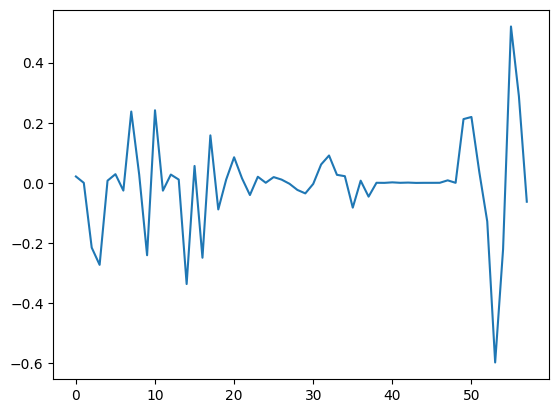

In [113]:
RRF = logit.fit(Data_C_X[INDEX_FOLD_C[0][1]],Data_C_Y[INDEX_FOLD_C[0][1]])
plt.plot(npy.array(range(0,58)).T,npy.array(RRF.coef_).T)
RRF = RF.fit(Data_C_X[INDEX_FOLD_C[1][1]],Data_C_Y[INDEX_FOLD_C[1][1]])
plt.plot(npy.array(range(0,58)).T,npy.array(RRF.coeif_).T)

In [110]:
#print(npy.array(RRF.feature_importances_).T)
#print(Variable_C)

[3.11294899e-03 2.08291846e-01 4.48183291e-03 4.10586437e-02
 0.00000000e+00 1.14209365e-03 7.32560361e-03 3.30144060e-02
 2.85846239e-04 2.92259104e-02 5.00705631e-02 6.27740428e-03
 4.81679470e-05 1.52362248e-03 5.68376868e-03 5.72940404e-03
 2.66026689e-03 8.03604201e-03 3.77475231e-02 1.63426267e-05
 1.53495651e-02 4.39508480e-04 5.62066943e-05 1.08343898e-04
 1.15272006e-02 8.77973417e-02 1.19928846e-01 8.69648821e-03
 1.33568496e-02 1.09460979e-04 3.35327438e-05 1.02804370e-04
 4.65954693e-04 1.20914229e-04 1.77530637e-05 6.16578300e-05
 7.58555628e-05 3.41863182e-05 3.39783198e-02 1.13412051e-03
 1.18728994e-04 3.48863928e-04 0.00000000e+00 2.66625084e-05
 1.53123065e-04 3.69320704e-03 8.23732444e-03 2.90830053e-02
 2.17386027e-02 1.08077527e-01 1.07497180e-02 4.96491965e-05
 1.53076826e-03 3.65258796e-02 4.38684509e-03 1.96640739e-02
 1.60458538e-02 4.43020691e-04]
Index(['Default', 'NewCreditCustomer', 'LoanDate', 'VerificationType',
       'Language_Estonian ', 'Language_Engl

In [120]:
ok = npy.array(logit.coef_)[0]
#print(Variable_A[1:])
out = ok,Variable_C[1:]
def fds(ofdsf,numero):
    print(ofdsf[0][numero])
    print(ofdsf[1][numero])


#fds(out,10)
for i in range(0,len(out[0])-1):
    if abs(out[0][i])>0.2:
        print(out[0][i],"___",out[1][i])

-0.21574536626853275 ___ VerificationType
-0.2730773398176881 ___ Language_Estonian 
0.23729708788642537 ___ Language_German
-0.24109176564324314 ___ Country_EE
0.24152054171719492 ___ Country_ES
-0.3369708353923306 ___ Gender_woman
-0.2493947249319255 ___ Education
0.21214305181619778 ___ ProbabilityOfDefault
0.2192123800236252 ___ Rate_AA
-0.5980905634028809 ___ Rate_C
-0.22135012486835975 ___ Rate_D
0.5204933693174078 ___ Rate_E
0.28862750943409216 ___ Rate_F
